# Sparks Foundation Task-1

## Name : Mahender Boda 

Problem Statement: In this task we will check whether there is any relation between the Score of the student and number of hours they studied. If there is any realtion then we will find out the realtionship. There are only 2 varibales in this dataset with one is "Hours" and another "Scores". As there are just 2 variables we use simple linear regression to solve this and find our predictions. Data can be found at http://bit.ly/w-data. Finally we are going to predict what will be the score of the student if he studies for 9.25 hrs in a day??

###### Importing Libraries

In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [40]:
#url contains the data so we are storing the address int the url string variable and using it to read the data using read_csv
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

##### EDA

In [41]:
#checking the sample of data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [42]:
#checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [43]:
#checking for basic statistics of the data 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###### Correlation

In [44]:
#correlation to understand how much they the target and predictor are correlated with each other
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


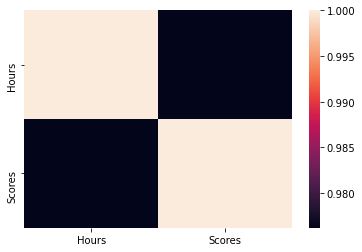

In [45]:
# correlation heat map showing the amoount of correlation between the target and predictor variables
sns.heatmap(df.corr())

###### Checking for null values

In [46]:
#checking for null values in the data set
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

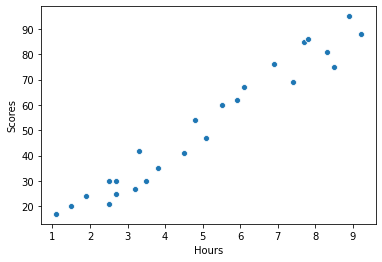

In [47]:
sns.scatterplot(x="Hours",y="Scores",data=df)

###### Data Preparation for Model Training

In [48]:
#preparing data for predictions seperating the target variable and predictors
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [49]:
#splitting the data into train and test data sets by importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
#importing linearRegression model and fitting the train data to the model 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

###### Predictions

In [51]:
#Predictions
y_pred = regressor.predict(X_test)

###### Comparing Actual and Predicted values

In [55]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0, 0.5, 'Scores')

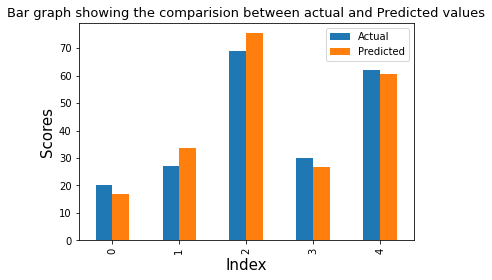

In [61]:
df2.plot(kind = "bar")
plt.title("Bar graph showing the comparision between actual and Predicted values",fontsize = 13)
plt.xlabel("Index",fontsize = 15)
plt.ylabel("Scores",fontsize = 15)


###### Checking values of intercepts and Coefficient

In [69]:
#intercept and coefficient of the model
print("Intercept of trained model",regressor.intercept_)
print("coefficient of trained model",regressor.coef_)

Intercept of trained model 2.018160041434683
coefficient of trained model [9.91065648]


###### Plots showing the fit of regression line for the trian data and test data

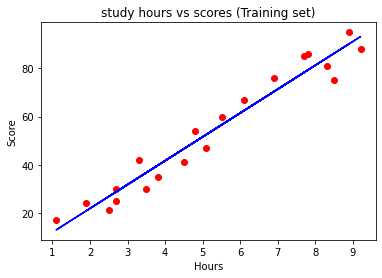

In [63]:
#plotting the regression line fit with train data 
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('study hours vs scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

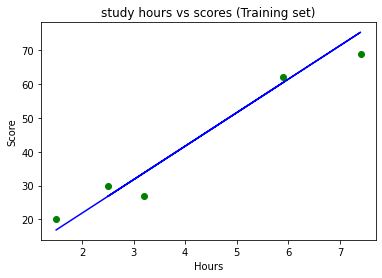

In [64]:
#plotting the regression line with the test data.
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('study hours vs scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

###### Evaluating model Performance using the metrics

In [65]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [68]:
# R square value to understand the performance of the model 
r_square = regressor.score(X, y)
print('coefficient of determination:', r_square)

coefficient of determination: 0.9526947647057274


In [71]:
#predicting the score for the desired value of Study hours 
Desired_pred = regressor.predict([[9.25]])
print(Desired_pred)

[93.69173249]


###### CONCLUSION   
so if a student reads for 9.25 hrs/day then he gets about 93.692 percentage of Score